In [1]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

from treemind import Explainer
from treemind.plot import (
    bar_plot,
    feature_plot,
    interaction_plot,
    interaction_scatter_plot,   
)


In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

model = LGBMClassifier(verbose=-1, is_unbalance=True)
model.fit(X, y)

y_predict = model.predict(X, raw_score=True)

In [3]:
explainer = Explainer()
explainer(model)

In [4]:
explainer.count_node(order=1).head()

,column1_index,count
0,21,1587
1,27,1448
2,23,1367
3,22,1358
4,1,1071


In [5]:
explainer.count_node(order=2).head()

,column1_index,column2_index,count
0,21,22,830
1,21,23,808
2,23,27,759
3,21,27,741
4,1,27,707


In [6]:
feature_21_df = explainer.analyze_feature(21)
feature_21_df.head()

,worst_texture_lb,worst_texture_ub,value,std,count
0,-inf,18.460,5.214150,4.030939,183.556701
1,18.460,19.300,5.189678,4.071581,183.711340
2,19.300,19.415,5.159437,4.081127,183.154639
3,19.415,20.225,5.119750,4.147688,183.876289
4,20.225,20.360,4.387992,4.714313,215.432990


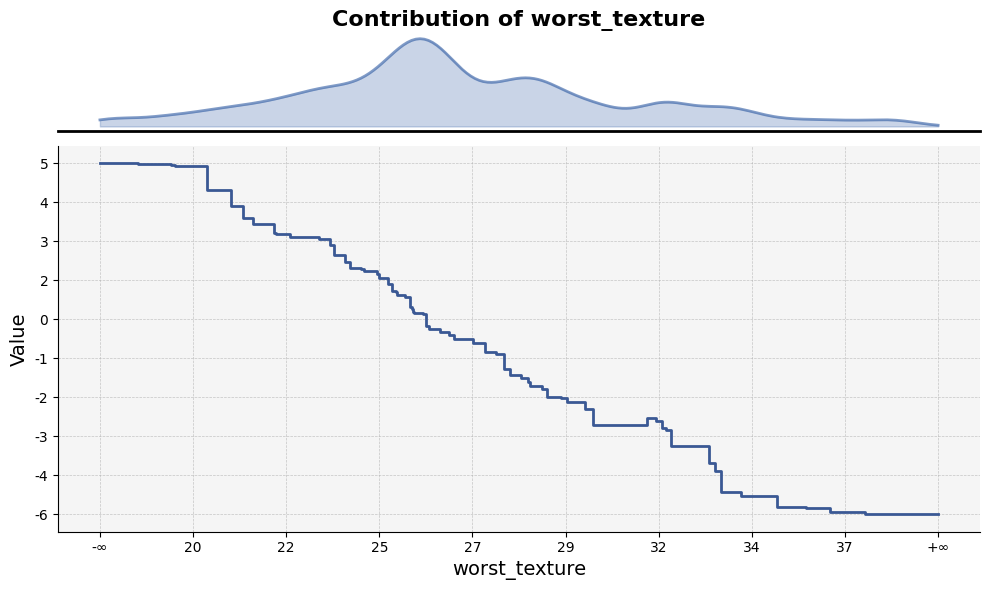

In [7]:
feature_plot(feature_21_df, show_range=True, figsize=(10,6))


In [8]:
feature_21_27_df = explainer.analyze_feature([21,27])
feature_21_27_df.head()

,worst_texture_lb,worst_texture_ub,worst_concave_points_lb,worst_concave_points_ub,value,std,count
0,-inf,19.3,-inf,0.059630,2.956921,0.272900,174.000000
1,-inf,19.3,0.059630,0.069320,2.856885,0.272900,176.750000
2,-inf,19.3,0.069320,0.069775,2.856885,0.272900,176.750000
3,-inf,19.3,0.069775,0.074420,2.856885,0.272901,176.692308
4,-inf,19.3,0.074420,0.093120,2.856885,0.272901,176.692308


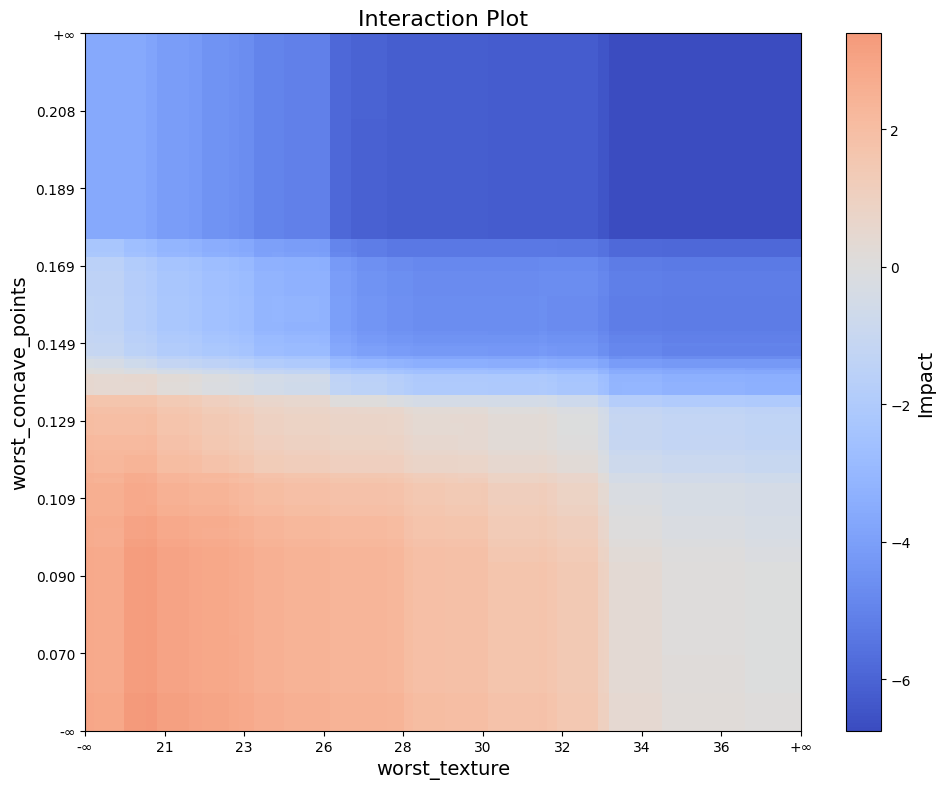

In [9]:
interaction_plot(feature_21_27_df)

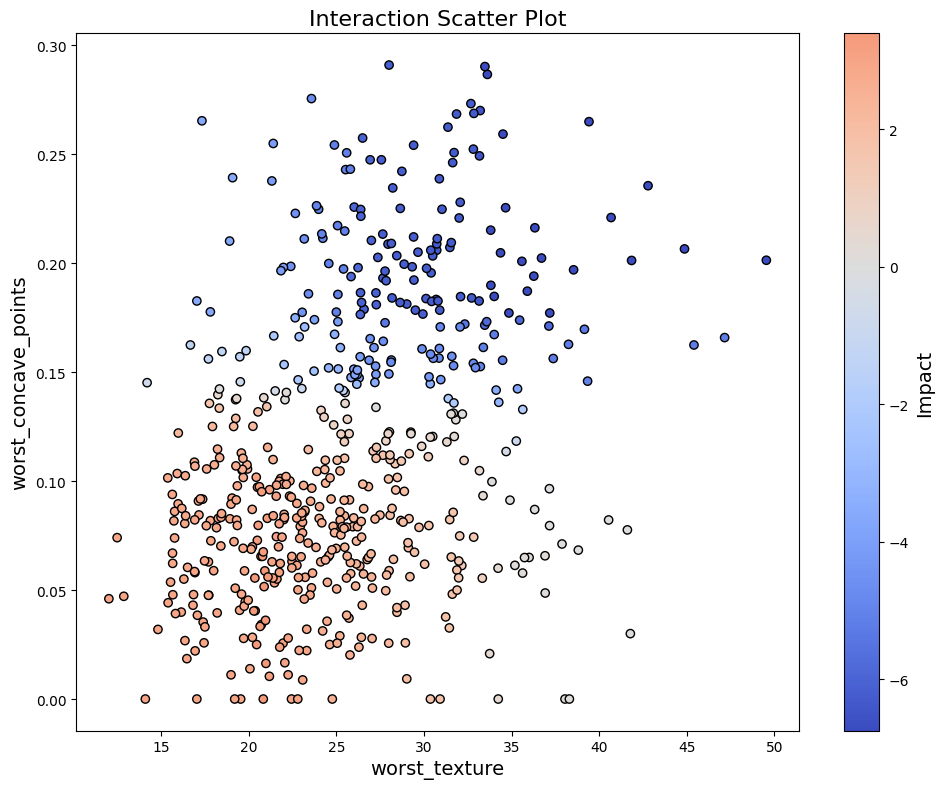

In [10]:
interaction_scatter_plot(X, feature_21_27_df, 21, 27)

In [11]:
values = explainer.analyze_data(X)

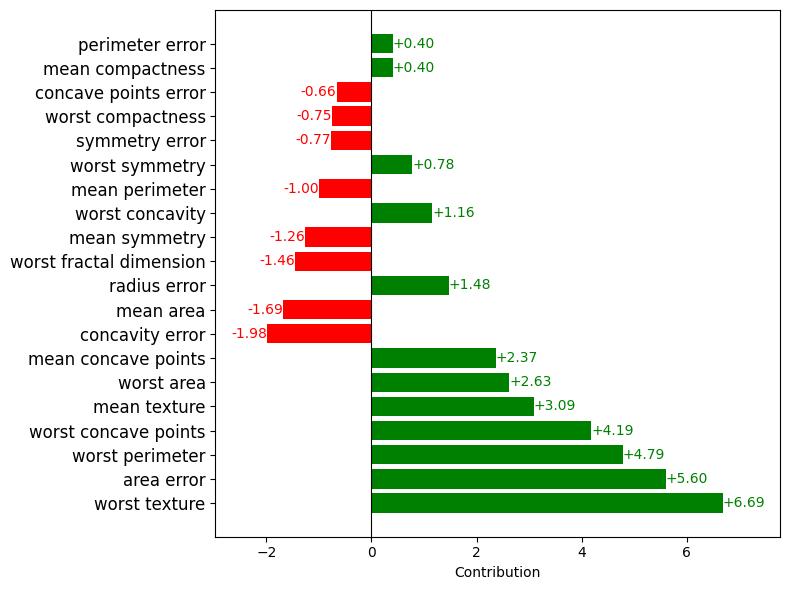

In [12]:
bar_plot(values[21], columns = X.columns)